In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
import warnings

# Ignore all future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
results_df = pd.DataFrame(columns=['Model', 'MAE', 'R2'])

In [4]:
# Function to check if the model name exists and append if it doesn't
def append_if_model_not_in_df(model_name, mae, r2, results_df):
    if model_name not in results_df['Model'].values:
        # Model name not found in the DataFrame
        results_df = results_df.append({'Model': model_name, 'MAE': mae, 'R2': r2}, ignore_index=True)
    else:
        # Model name is already in the DataFrame
        print(f"Results for {model_name} are already in the DataFrame.")
    return results_df

In [5]:
def results(X_test, y_test, model):
    y_pred = model.predict(X_test)
    #Return Mean Absolute Error
    mae = mean_absolute_error(y_test, y_pred)
    print('MAE: %.3f' % mae)

    #Return the coefficient of determination R^2 of the prediction.
    r2 = model.score(X_test, y_test)
    print("R^2 value of the model: ", r2)

    return mae, r2

In [6]:
train_data = pd.read_csv("Training_Preprocessed.csv")
test_data = pd.read_csv("Test_Preprocessed.csv")
train_data.drop('dteday', axis=1, inplace=True)
test_data.drop('dteday', axis=1, inplace=True)

In [7]:
X_train = train_data.drop(["instant", "casual", "registered", "cnt"], axis=1)
y_train = train_data["cnt"]

X_test = test_data.drop(["instant", "casual", "registered", "cnt"], axis=1)
y_test = test_data["cnt"]

In [8]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg_results = results(X_test, y_test, lin_reg)
results_df = append_if_model_not_in_df('Linear regression (no selection)', lin_reg_results[0], lin_reg_results[1], results_df)

MAE: 1716.873
R^2 value of the model:  0.635511906872693


In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree = 2
poly_reg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_reg.fit(X_train, y_train)
poly_reg_results = results(X_test, y_test, poly_reg)
results_df = append_if_model_not_in_df('Polynomial regression (no selection, degree: 2)', poly_reg_results[0], poly_reg_results[1], results_df)

MAE: 2092.486
R^2 value of the model:  0.4531271100517047


In [10]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 3)
knn.fit(X_train,y_train)
knn_results = results(X_test, y_test, knn)
results_df = append_if_model_not_in_df('KNN regression (no selection, neighbors = 3)', lin_reg_results[0], lin_reg_results[1], results_df)

MAE: 2170.632
R^2 value of the model:  0.2588342769235781


In [11]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=0, max_depth=5)
tree_reg.fit(X_train, y_train)
tree_reg_results = results(X_test, y_test, tree_reg)
results_df = append_if_model_not_in_df('Decision Tree regression (no selection, max depth: 5)', tree_reg_results[0], tree_reg_results[1], results_df)

MAE: 806.156
R^2 value of the model:  0.8262467791502235


In [12]:
train_data = pd.read_csv("Training_Preprocessed.csv")
test_data = pd.read_csv("Test_Preprocessed.csv")
train_data.drop('dteday', axis=1, inplace=True)
test_data.drop('dteday', axis=1, inplace=True)

Add nominal features

In [13]:
train_data["weathersit"] = train_data["weathersit"].apply(lambda i:
                                                          "Clear" if i == 1
                                                          else "Mist" if i == 2
                                                          else "Scattered" if i == 3
                                                          else "Rain" if i == 4
                                                          else None)

train_data["season"] = train_data["season"].apply(lambda i:
                                      "winter" if i == 1
                                      else "spring" if i == 2
                                      else "summer" if i == 3
                                      else 'autumn' if i == 4
                                      else None)
month_mapping = {
    1: "January", 2: "February", 3: "March", 4: "April",
    5: "May", 6: "June", 7: "July", 8: "August",
    9: "September", 10: "October", 11: "November", 12: "December"
}

weekday_mapping = {
    1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday",
    5: "Friday", 6: "Saturday", 7: "Sunday"
}

train_data["weekday"] = train_data["weekday"].apply(lambda i: weekday_mapping.get(i, None))
train_data["mnth"] = train_data["mnth"].apply(lambda i: month_mapping.get(i, None))

In [14]:
test_data["weathersit"] = test_data["weathersit"].apply(lambda i:
                                                          "Clear" if i == 1
                                                          else "Mist" if i == 2
                                                          else "Scattered" if i == 3
                                                          else "Rain" if i == 4
                                                          else None)

test_data["season"] = test_data["season"].apply(lambda i:
                                                  "winter" if i == 1
                                                  else "spring" if i == 2
                                                  else "summer" if i == 3
                                                  else 'autumn' if i == 4
                                                  else None)
month_mapping = {
    1: "January", 2: "February", 3: "March", 4: "April",
    5: "May", 6: "June", 7: "July", 8: "August",
    9: "September", 10: "October", 11: "November", 12: "December"
}

weekday_mapping = {
    1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday",
    5: "Friday", 6: "Saturday", 7: "Sunday"
}

test_data["weekday"] = test_data["weekday"].apply(lambda i: weekday_mapping.get(i, None))
test_data["mnth"] = test_data["mnth"].apply(lambda i: month_mapping.get(i, None))

In [15]:
nominal_features = train_data.select_dtypes(include=[object])
numeric_features = train_data.drop(['registered', 'casual','instant'], axis = 1).select_dtypes(include=[np.number])

label = numeric_features.pop("cnt")

In [16]:
nominal_features

,season,mnth,weekday,weathersit
0,spring,June,Friday,Clear
1,autumn,November,Thursday,Mist
2,winter,January,Tuesday,Clear
3,spring,April,Monday,Clear
4,winter,March,Saturday,Mist
...,...,...,...,...
490,summer,September,Tuesday,Scattered
491,spring,April,Friday,Mist
492,summer,August,Monday,Mist
493,spring,April,Monday,Clear


In [17]:
nominal_features_test = test_data.select_dtypes(include=[object])
numeric_features_test = test_data.drop(['registered', 'casual','instant'], axis = 1).select_dtypes(include=[np.number])

label_test = numeric_features_test.pop("cnt")

# Feature selection by variance and variation ratio


Nominal features

In [18]:
nominal_features.describe()

,season,mnth,weekday,weathersit
count,495,495,424,495
unique,4,12,6,3
top,spring,June,Thursday,Clear
freq,133,47,77,308


In [19]:
nominal_features_var = nominal_features.apply(lambda x: x.value_counts(normalize=True).max(), axis=0)
nominal_features_var_ratio=1-nominal_features_var
nominal_features_var_ratio

season        0.731313
mnth          0.905051
weekday       0.818396
weathersit    0.377778
dtype: float64

In [20]:
nominal_features_one_hot = pd.get_dummies(nominal_features)
nominal_features_one_hot_test = pd.get_dummies(nominal_features_test)
nominal_features_one_hot

,season_autumn,season_spring,season_summer,season_winter,mnth_April,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,...,mnth_September,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Clear,weathersit_Mist,weathersit_Scattered
0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
3,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
491,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
492,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
493,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [21]:
nominal_features_one_hot_var = nominal_features_one_hot.var()
nominal_features_one_hot_var

season_autumn           0.184026
season_spring           0.196892
season_summer           0.187118
season_winter           0.182980
mnth_April              0.076122
mnth_August             0.079483
mnth_December           0.074428
mnth_February           0.076122
mnth_January            0.076122
mnth_July               0.074428
mnth_June               0.086108
mnth_March              0.069300
mnth_May                0.082812
mnth_November           0.076122
mnth_October            0.072727
mnth_September          0.074428
weekday_Friday          0.120206
weekday_Monday          0.123110
weekday_Saturday        0.121662
weekday_Thursday        0.131624
weekday_Tuesday         0.125980
weekday_Wednesday       0.112804
weathersit_Clear        0.235538
weathersit_Mist         0.227808
weathersit_Scattered    0.027539
dtype: float64

Numeric features

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numeric_features = pd.DataFrame(scaler.fit_transform(numeric_features), columns=numeric_features.columns)
numeric_features_test = pd.DataFrame(scaler.fit_transform(numeric_features_test), columns=numeric_features.columns)
numeric_features.describe()

,yr,workingday,temp,hum,windspeed,leaflets,price reduction
count,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000
mean,0.511111,0.684848,0.504746,0.521657,0.400560,0.485820,0.137374
std,0.500382,0.465046,0.248246,0.194587,0.186796,0.283377,0.344590
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.282633,0.381961,0.268526,0.243007,0.000000
50%,1.000000,1.000000,0.515322,0.514501,0.372412,0.480769,0.000000
75%,1.000000,1.000000,0.723609,0.660659,0.501922,0.718531,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
#calculate variance of numeric features
numeric_features_var = numeric_features.var()
numeric_features_var

yr                 0.250382
workingday         0.216268
temp               0.061626
hum                0.037864
windspeed          0.034893
leaflets           0.080303
price reduction    0.118742
dtype: float64

In [24]:
numeric_features_low_var = numeric_features.loc[:, numeric_features.var() < 0.05]
numeric_features_low_var

,hum,windspeed
0,0.139211,0.550442
1,0.509861,0.311556
2,0.260440,0.818948
3,0.428074,0.626086
4,0.698375,0.210683
...,...,...
490,0.880915,0.767112
491,0.810325,0.488107
492,0.556845,0.255176
493,0.727379,0.388722


# Feature selection for numeric features using correlation and colinearity

In [25]:
#calculate correlation of numeric features with label
numeric_features_corr = numeric_features.corrwith(label)
numeric_features_corr

yr                 0.295124
workingday         0.001501
temp               0.657667
hum               -0.128074
windspeed         -0.206001
leaflets          -0.031639
price reduction   -0.014675
dtype: float64

In [26]:
#keep 5 best numeric features
numeric_features = numeric_features[numeric_features_corr.abs().sort_values(ascending=False).index[:5]]
numeric_features_test = numeric_features_test[numeric_features_corr.abs().sort_values(ascending=False).index[:5]]
numeric_features_corr = numeric_features.corrwith(label)
numeric_features_corr

temp         0.657667
yr           0.295124
windspeed   -0.206001
hum         -0.128074
leaflets    -0.031639
dtype: float64

In [27]:
#calculate colinearity of remaining numeric features
numeric_features_corr = numeric_features.corr()
# Displaying correlations as a heatmap / correlation matrix
numeric_features_corr.style.background_gradient(cmap ='coolwarm')

,temp,yr,windspeed,hum,leaflets
temp,1.000000,0.027655,-0.180952,0.118373,0.002493
yr,0.027655,1.000000,-0.012301,-0.138729,-0.081810
windspeed,-0.180952,-0.012301,1.000000,-0.220864,-0.009016
hum,0.118373,-0.138729,-0.220864,1.000000,-0.044002
leaflets,0.002493,-0.081810,-0.009016,-0.044002,1.000000


In [28]:
#calculate multicollinearity of numeric features
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(df):
    vif = pd.DataFrame()
    vif["features"] = df.columns
    vif["VIF Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif
calc_vif(numeric_features)

,features,VIF Factor
0,temp,4.461709
1,yr,1.904048
2,windspeed,3.744500
3,hum,5.238580
4,leaflets,3.388039


In [29]:
numeric_features

,temp,yr,windspeed,hum,leaflets
0,0.670828,0.0,0.550442,0.139211,0.930070
1,0.264473,1.0,0.311556,0.509861,0.248252
2,0.030647,1.0,0.818948,0.260440,0.157343
3,0.730988,1.0,0.626086,0.428074,0.491259
4,0.526675,1.0,0.210683,0.698375,0.548951
...,...,...,...,...,...
490,0.561861,0.0,0.767112,0.880915,0.531469
491,0.283767,0.0,0.488107,0.810325,0.783217
492,0.851304,1.0,0.255176,0.556845,0.702797
493,0.652668,0.0,0.388722,0.727379,0.520979


# Feature selection for nominal features using chi2 test


In [30]:
# perform chi-squared test for nominal features
from scipy.stats import chi2_contingency

def calc_chi2(df, a, b):
    #df contains the two variables to be tested
    #----------step 2: Create a cross tab which is a contigency table
    data_cont=pd.crosstab(df.iloc[:,a], df.iloc[:,b])
    stat, p, dof, expected = chi2_contingency(data_cont)
    alpha = 0.05
    print("p value is " + str(p))

    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (H0 holds true)')

#check independence of features to each other

calc_chi2(nominal_features, 0, 1)
calc_chi2(nominal_features, 0, 2)
calc_chi2(nominal_features, 0, 3)
calc_chi2(nominal_features, 1, 2)
calc_chi2(nominal_features, 1, 3)
calc_chi2(nominal_features, 2, 3)

p value is 2.118968027440265e-291
Dependent (reject H0)
p value is 0.9998272140917392
Independent (H0 holds true)
p value is 0.12761042226654415
Independent (H0 holds true)
p value is 0.9999999864051758
Independent (H0 holds true)
p value is 0.012934000161113991
Dependent (reject H0)
p value is 0.32563820701927454
Independent (H0 holds true)


In [31]:
def calc_chi2_1(df):
    #df contains the two variables to be tested
    #----------step 2: Create a cross tab which is a contigency table
    data_cont=pd.crosstab(df.iloc[:,0], df.iloc[:,1])
    stat, p, dof, expected = chi2_contingency(data_cont)
    alpha = 0.05
    print("p value is " + str(p))
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (H0 holds true)')

In [32]:
#check independence of features to label
nominal_label=pd.DataFrame()
#apply binning to label
nominal_label['label']=pd.cut(label, 2)

#first check label vs. label
nominal_label['label_copy']=pd.cut(label, 2)
print('Check independence of label and label')
calc_chi2_1(nominal_label.iloc[:,:2])

#check label vs. season
nominal_label['season']=nominal_features.iloc[:,0]
print('\nCheck independence of "season" and label')
calc_chi2_1(nominal_label.loc[:,['label','season']])

#check label vs. month
nominal_label['mnth']=nominal_features.iloc[:,1]
print('\nCheck independence of "mnth" and label')
calc_chi2_1(nominal_label.loc[:,['label','mnth']])

#check label vs. weekday
nominal_label['weekday']=nominal_features.iloc[:,2]
print('\nCheck independence of "weekday" and label')
calc_chi2_1(nominal_label.loc[:,['label','weekday']])

#check label vs. weathersit
nominal_label['weathersit']=nominal_features.iloc[:,3]
print('\nCheck independence of "weathersit" and label')
calc_chi2_1(nominal_label.loc[:,['label','weathersit']])

Check independence of label and label
p value is 9.448416403251826e-107
Dependent (reject H0)

Check independence of "season" and label
p value is 2.4317598186755966e-28
Dependent (reject H0)

Check independence of "mnth" and label
p value is 3.734938760402731e-99
Dependent (reject H0)

Check independence of "weekday" and label
p value is 0.9731821891038214
Independent (H0 holds true)

Check independence of "weathersit" and label
p value is 0.0445156847778524
Dependent (reject H0)


In [33]:
nominal_features = nominal_features.drop(['weekday', 'season'], axis = 1)
nominal_features_test = nominal_features_test.drop(['weekday', 'season'], axis = 1)

In [34]:
nominal_features

,mnth,weathersit
0,June,Clear
1,November,Mist
2,January,Clear
3,April,Clear
4,March,Mist
...,...,...
490,September,Scattered
491,April,Mist
492,August,Mist
493,April,Clear


In [35]:
nominal_features_one_hot = pd.get_dummies(nominal_features)
nominal_features_one_hot_test = pd.get_dummies(nominal_features_test)

In [36]:
nominal_features_one_hot

,mnth_April,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weathersit_Clear,weathersit_Mist,weathersit_Scattered
0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
491,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
492,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
493,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


We need to include month weathersit, mnth and season

In [37]:
X_train = pd.concat([numeric_features, nominal_features_one_hot], axis=1)
X_train = X_train.drop(['mnth_April','weathersit_Clear'], axis=1)
X_test = pd.concat([numeric_features_test, nominal_features_one_hot_test], axis=1)
X_test = X_test.drop(['mnth_April','weathersit_Clear'], axis=1)

In [38]:
X_train.var()

temp                    0.061626
yr                      0.250382
windspeed               0.034893
hum                     0.037864
leaflets                0.080303
mnth_August             0.079483
mnth_December           0.074428
mnth_February           0.076122
mnth_January            0.076122
mnth_July               0.074428
mnth_June               0.086108
mnth_March              0.069300
mnth_May                0.082812
mnth_November           0.076122
mnth_October            0.072727
mnth_September          0.074428
weathersit_Mist         0.227808
weathersit_Scattered    0.027539
dtype: float64

# Algorithms Selection and Model Tuning

In [39]:
def results(X_test, y_test, model):
    y_pred = model.predict(X_test)
    #Return Mean Absolute Error
    mae = mean_absolute_error(y_test, y_pred)
    print('MAE: %.3f' % mae)

    #Return the coefficient of determination R^2 of the prediction.
    r2 = model.score(X_test, y_test)
    print("R^2 value of the model: ", r2)

    return mae, r2

In [40]:
#plotting the MAE and R^2 for comparison
def plot_results(n, mae_values, r2_values, metrics):

    plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

    plt.subplot(1, 2, 1)
    plt.plot(np.arange(1, n), mae_values, marker='o', linestyle='-', color='b')
    plt.xlabel(metrics)
    plt.ylabel('Mean Absolute Error (MAE)')
    plt.xticks(np.arange(0, n, 2))


    plt.subplot(1, 2, 2)
    plt.plot(np.arange(1, n), r2_values, marker='o', linestyle='-', color='b')
    plt.xlabel(metrics)
    plt.ylabel('R^2')
    plt.xticks(np.arange(0, n, 2))


    plt.tight_layout()
    plt.show()

In [41]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, label)
lin_reg_results = results(X_test, label_test, lin_reg)

MAE: 634.590
R^2 value of the model:  0.952308983241253


In [42]:
results_df = append_if_model_not_in_df('Linear regression (selected features)', lin_reg_results[0], lin_reg_results[1], results_df)
results_df

,Model,MAE,R2
0,Linear regression (no selection),1716.873020,0.635512
1,"Polynomial regression (no selection, degree: 2)",2092.486436,0.453127
2,"KNN regression (no selection, neighbors = 3)",1716.873020,0.635512
3,"Decision Tree regression (no selection, max de...",806.155972,0.826247
4,Linear regression (selected features),634.589904,0.952309


Polynomial regression model:

In [43]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [44]:
def tune_and_evaluate_poly_model(X_train, X_test, degree):
    # Initialize and fit polynomial regression
    poly_reg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    poly_reg.fit(X_train, label)

    # Predict on test data
    y_pred = poly_reg.predict(X_test)

    # Evaluate the model
    mae = mean_absolute_error(label_test, y_pred)
    r2 = r2_score(label_test, y_pred)

    return mae, r2

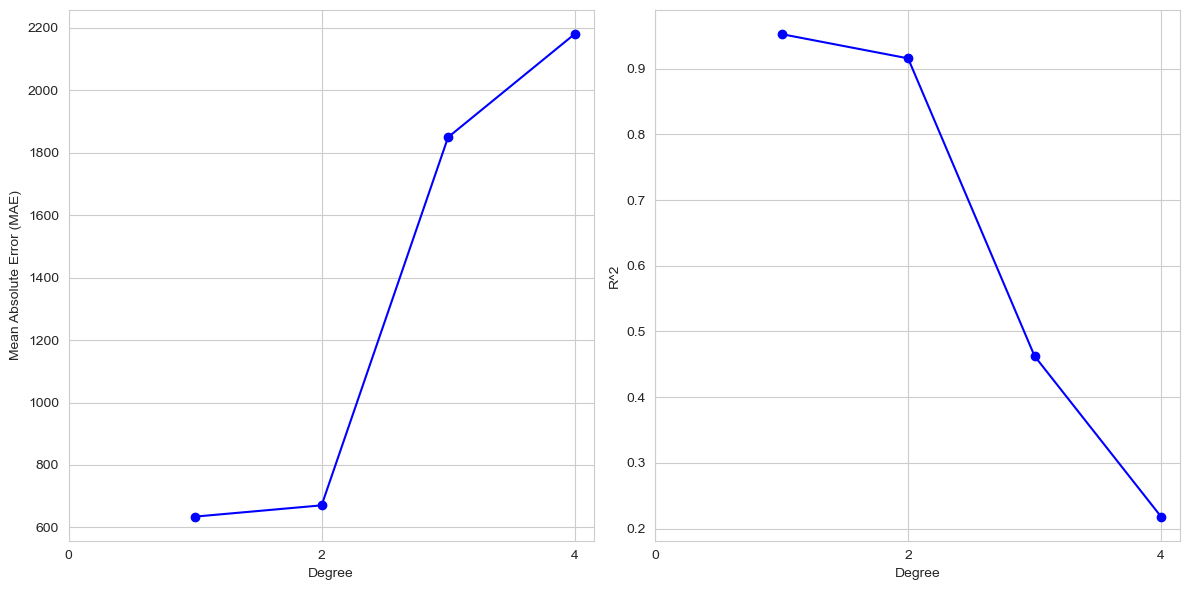

In [45]:
mae_values, r2_values = [], []
degrees = 5
for degree in range(1, degrees):
    mae, r2 = tune_and_evaluate_poly_model(X_train, X_test, degree)
    mae_values.append(mae)
    r2_values.append(r2)
plot_results(degrees, mae_values, r2_values, 'Degree')

In [46]:
best_value = 2
results_df = append_if_model_not_in_df('Polynomial regression (degree: 2)', mae_values[best_value-1], r2_values[best_value-1], results_df)
results_df

,Model,MAE,R2
0,Linear regression (no selection),1716.873020,0.635512
1,"Polynomial regression (no selection, degree: 2)",2092.486436,0.453127
2,"KNN regression (no selection, neighbors = 3)",1716.873020,0.635512
3,"Decision Tree regression (no selection, max de...",806.155972,0.826247
4,Linear regression (selected features),634.589904,0.952309
5,Polynomial regression (degree: 2),670.648535,0.915439


Regression tree:

In [47]:
from sklearn.tree import DecisionTreeRegressor

In [48]:
def evaluate_tree_model(X_train, X_test, max_depth):
    # Initialize and fit decision tree regression
    tree_reg = DecisionTreeRegressor(random_state=0, max_depth=max_depth)
    tree_reg.fit(X_train, label)

    # Predict on test data
    y_pred = tree_reg.predict(X_test)

    # Evaluate the model
    mae = mean_absolute_error(label_test, y_pred)
    r2 = r2_score(label_test, y_pred)

    return mae, r2

In [49]:
mae_values, r2_values = [], []
max_depth_values = 10

for max_depth in range(1, max_depth_values):
    tree_reg = DecisionTreeRegressor(random_state=0, max_depth=max_depth)
    mae, r2 = evaluate_tree_model(X_train, X_test, max_depth)
    mae_values.append(mae)
    r2_values.append(r2)

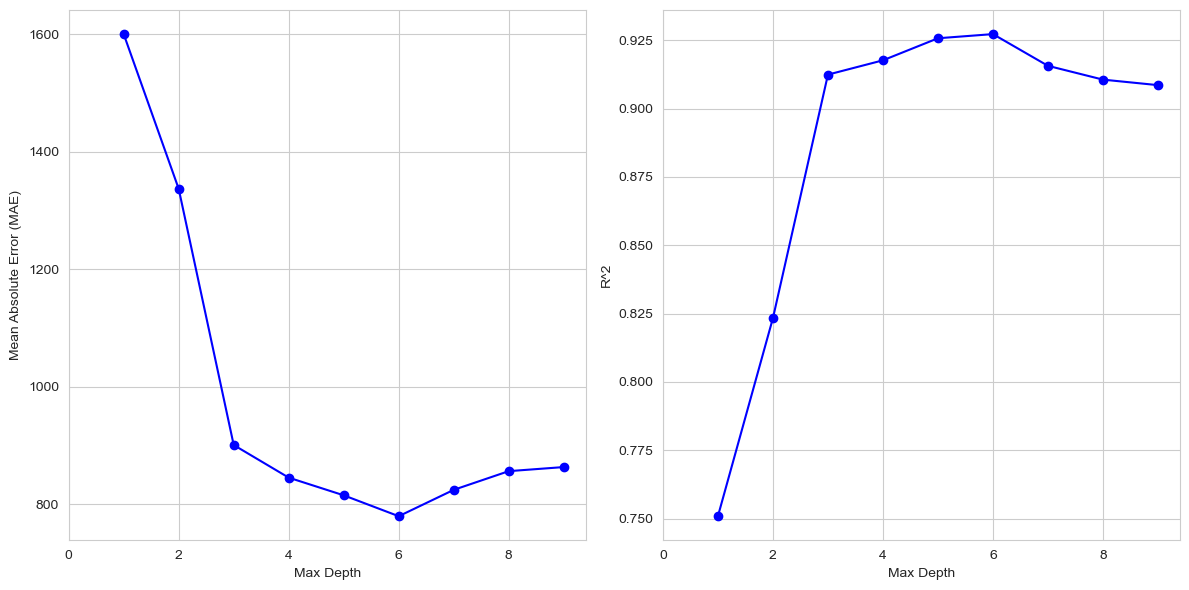

In [50]:
plot_results(max_depth_values, mae_values, r2_values, 'Max Depth')

In [51]:
best_value = 6
results_df = append_if_model_not_in_df(f'Decision tree (Max Depth: {best_value})', mae_values[best_value-1], r2_values[best_value-1], results_df)
results_df

,Model,MAE,R2
0,Linear regression (no selection),1716.873020,0.635512
1,"Polynomial regression (no selection, degree: 2)",2092.486436,0.453127
2,"KNN regression (no selection, neighbors = 3)",1716.873020,0.635512
3,"Decision Tree regression (no selection, max de...",806.155972,0.826247
4,Linear regression (selected features),634.589904,0.952309
5,Polynomial regression (degree: 2),670.648535,0.915439
6,Decision tree (Max Depth: 6),780.020660,0.927206


In [52]:
#function that takes model and features and returns MAE and R^2
def tune_and_evaluate_knn(model, X_train, X_test, number_of_neighbors):
    model.set_params(n_neighbors = number_of_neighbors)

    #Fit regression model to training data
    model.fit(X_train,label)
    #Predict all test examples
    ypred = model.predict(X_test)
    #Evaluate KNN regression model with test data using Mean Absolute Error
    mae = mean_absolute_error(label_test, ypred)
    r2 = model.score(X_test, label_test)
    return mae, r2

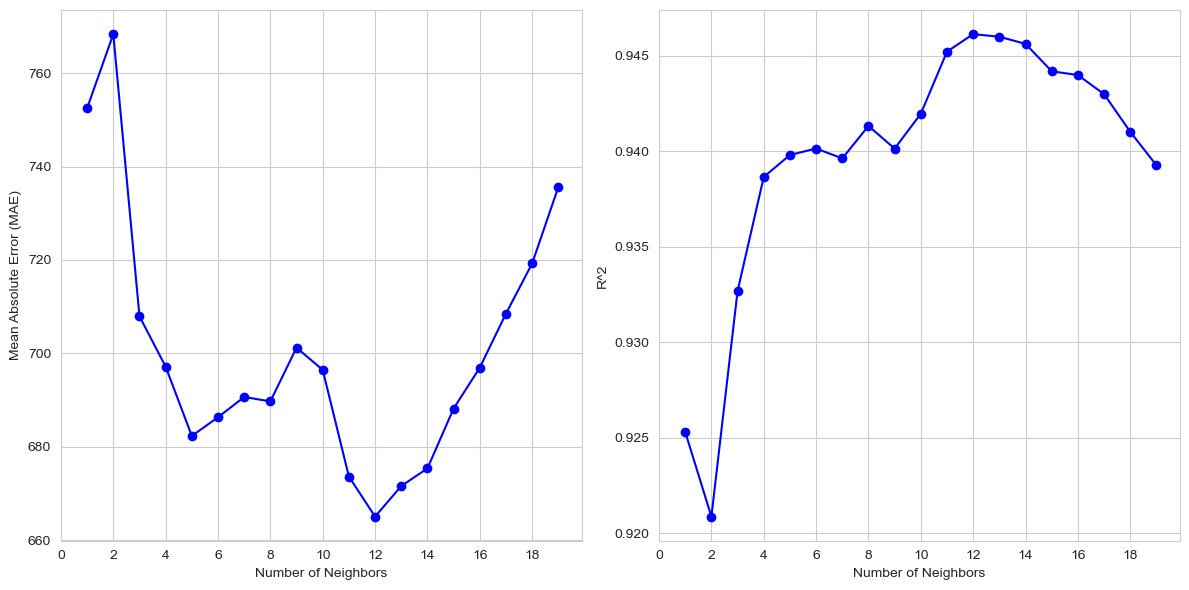

In [53]:
mae_values, r2_values = [], []
n = 20
for number_of_neighbors in range(1, n):
    KNN_reg = KNeighborsRegressor()
    mae, r2 = tune_and_evaluate_knn(KNN_reg, X_train, X_test, number_of_neighbors)
    mae_values.append(mae)
    r2_values.append(r2)
plot_results(n, mae_values, r2_values, 'Number of Neighbors')

In [54]:
best_value = 12
results_df = append_if_model_not_in_df(f'KNN Regression (Number of Neighbors: {best_value})', mae_values[best_value-1], r2_values[best_value-1], results_df)
results_df

,Model,MAE,R2
0,Linear regression (no selection),1716.873020,0.635512
1,"Polynomial regression (no selection, degree: 2)",2092.486436,0.453127
2,"KNN regression (no selection, neighbors = 3)",1716.873020,0.635512
3,"Decision Tree regression (no selection, max de...",806.155972,0.826247
4,Linear regression (selected features),634.589904,0.952309
5,Polynomial regression (degree: 2),670.648535,0.915439
6,Decision tree (Max Depth: 6),780.020660,0.927206
7,KNN Regression (Number of Neighbors: 12),665.016214,0.946123


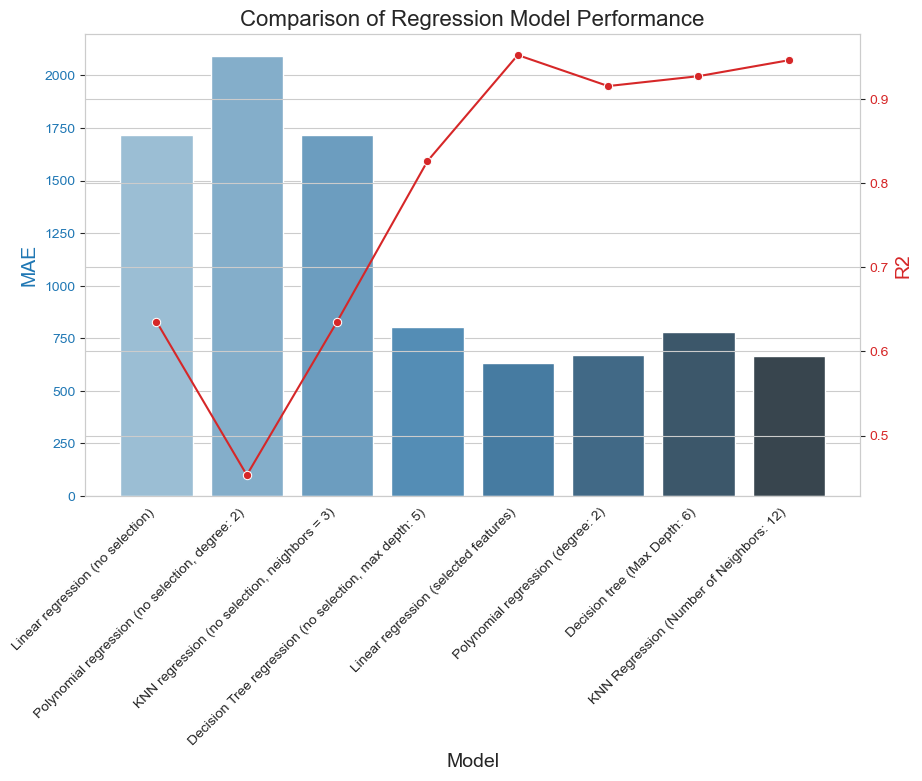

In [55]:
import seaborn as sns

fig, ax1 = plt.subplots(figsize=(10, 6))


ax1.set_title('Comparison of Regression Model Performance', fontsize=16)
ax1.set_xlabel('Model', fontsize=14)
ax1.set_ylabel('MAE', fontsize=14, color='tab:blue')
ax1 = sns.barplot(x='Model', y='MAE', data=results_df, palette='Blues_d')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_xticklabels(results_df['Model'], rotation=45, ha='right')

ax2 = ax1.twinx()

ax2.set_ylabel('R2', fontsize=14, color='tab:red')
ax2 = sns.lineplot(x='Model', y='R2', data=results_df, sort=False, marker='o', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.show()

Cross Validation using train_test_split

MAE: 680.046
R^2 value of the model:  0.9414317898342406
MAE: 1212.409
R^2 value of the model:  0.582685590437003
MAE: 876.986
R^2 value of the model:  0.9184995877834573
MAE: 697.199
R^2 value of the model:  0.9482772704944598


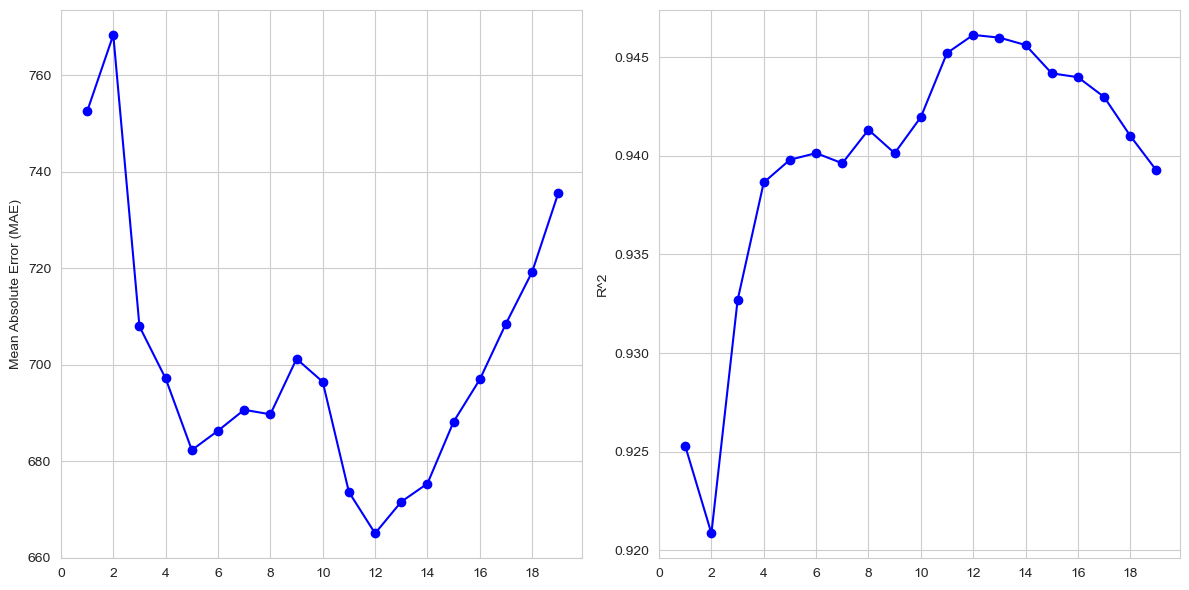

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import numpy as np

# Annahme: X_train, X_test, label, label_test sind bereits definiert

# Funktion für die Ergebnisse
def results(X_test, y_test, model):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = model.score(X_test, y_test)
    print('MAE: %.3f' % mae)
    print("R^2 value of the model: ", r2)
    return mae, r2

# Funktion für die Ergebnisse
def plot_results(n, mae_values, r2_values):
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.plot(np.arange(1, n), mae_values, marker='o', linestyle='-', color='b')
    plt.ylabel('Mean Absolute Error (MAE)')
    plt.xticks(np.arange(0, n, 2))

    plt.subplot(1, 2, 2)
    plt.plot(np.arange(1, n), r2_values, marker='o', linestyle='-', color='b')
    plt.ylabel('R^2')
    plt.xticks(np.arange(0, n, 2))

    plt.tight_layout()
    plt.show()

# Trainings- und Testdaten aufteilen
X_train_split, X_test_split, label_train_split, label_test_split = train_test_split(X_train, label, test_size=0.2, random_state=42)

# Lineare Regression mit Validierung
lin_reg = LinearRegression()
lin_reg.fit(X_train_split, label_train_split)
lin_reg_results = results(X_test_split, label_test_split, lin_reg)

# Polynomial Regression mit Validierung
degree = 2  # Grad des Polynoms
poly_reg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_reg.fit(X_train_split, label_train_split)
poly_reg_results = results(X_test_split, label_test_split, poly_reg)

# Entscheidungsbaum mit Validierung
max_depth = 3  # Maximale Tiefe des Entscheidungsbaums
tree_reg = DecisionTreeRegressor(random_state=0, max_depth=max_depth)
tree_reg.fit(X_train_split, label_train_split)
tree_reg_results = results(X_test_split, label_test_split, tree_reg)

# KNN mit Validierung
n_neighbors = 12  # Anzahl der Nachbarn
knn_reg = KNeighborsRegressor(n_neighbors=n_neighbors)
knn_reg.fit(X_train_split, label_train_split)
knn_reg_results = results(X_test_split, label_test_split, knn_reg)

# Ergebnisse in einem DataFrame oder einer Liste speichern und vergleichen
plot_results(n, mae_values, r2_values)

Cross Validation using cross_val_score

In [94]:
from sklearn.model_selection import cross_val_score

def cv_print(model, name):
    scores = cross_val_score(model, X_train, label, cv=5)
    print("Cross Validation scores for " + name + ": ", scores)
    return name, scores.mean()


In [102]:
cv_results = []

lin = LinearRegression()

# Polynomial Regression mit Validierung
degree = 2  # Grad des Polynoms
poly = make_pipeline(PolynomialFeatures(degree), LinearRegression())

max_depth = 3
tree = DecisionTreeRegressor(random_state=0, max_depth=max_depth)

n_neighbors = 12
knn = KNeighborsRegressor(n_neighbors=n_neighbors)

cv_results.append(cv_print(lin, "Linear Regression"))
cv_results.append(cv_print(poly, "Polynomial Regression"))
cv_results.append(cv_print(tree, "Tree Regression"))
cv_results.append(cv_print(knn, "KNN"))




cv_df = pd.DataFrame(cv_results, columns=['Model', 'Average CV'])

print(cv_df)

Cross Validation scores for Linear Regression:  [0.94676211 0.94230558 0.95018693 0.94229422 0.93439699]
Cross Validation scores for Polynomial Regression:  [0.9632467  0.9370062  0.95459113 0.92708458 0.7394573 ]
Cross Validation scores for Tree Regression:  [0.90401036 0.8711289  0.92139664 0.90895458 0.85123314]
Cross Validation scores for KNN:  [0.92645026 0.89568045 0.92421652 0.93490622 0.90336877]
                   Model  Average CV
0      Linear Regression    0.943189
1  Polynomial Regression    0.904277
2        Tree Regression    0.891345
3                    KNN    0.916924


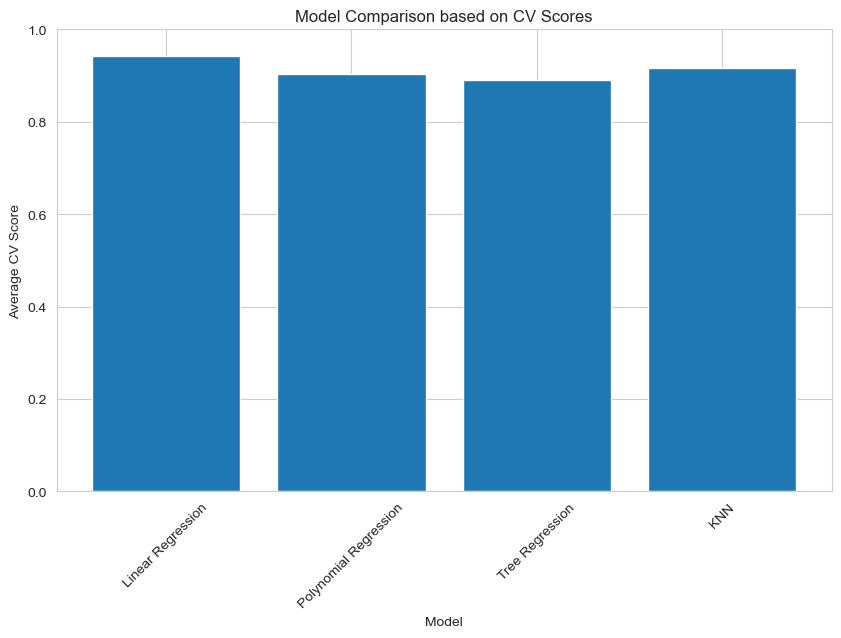

In [103]:
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(cv_df['Model'], cv_df['Average CV'])
plt.xlabel('Model')
plt.ylabel('Average CV Score')
plt.title('Model Comparison based on CV Scores')
plt.ylim(0, 1)  # Assuming scores are between 0 and 1
plt.xticks(rotation=45)
plt.show()